In [5]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [214]:
data_1 = pd.read_csv(r'C:\Users\alexa\Desktop\Alexa\Sales_Product\Sales_January_2019.csv')
data_2 = pd.read_csv(r'C:\Users\alexa\Desktop\Alexa\Sales_Product\Sales_February_2019.csv')
data_3 = pd.read_csv(r'C:\Users\alexa\Desktop\Alexa\Sales_Product\Sales_March_2019.csv')
data_4 = pd.read_csv(r'C:\Users\alexa\Desktop\Alexa\Sales_Product\Sales_April_2019.csv')
data_5 = pd.read_csv(r'C:\Users\alexa\Desktop\Alexa\Sales_Product\Sales_May_2019.csv')
data_6 = pd.read_csv(r'C:\Users\alexa\Desktop\Alexa\Sales_Product\Sales_June_2019.csv')
data_7 = pd.read_csv(r'C:\Users\alexa\Desktop\Alexa\Sales_Product\Sales_July_2019.csv')
data_8 = pd.read_csv(r'C:\Users\alexa\Desktop\Alexa\Sales_Product\Sales_August_2019.csv')
data_9 = pd.read_csv(r'C:\Users\alexa\Desktop\Alexa\Sales_Product\Sales_September_2019.csv')
data_10 = pd.read_csv(r'C:\Users\alexa\Desktop\Alexa\Sales_Product\Sales_October_2019.csv')
data_11 = pd.read_csv(r'C:\Users\alexa\Desktop\Alexa\Sales_Product\Sales_November_2019.csv')
data_12 = pd.read_csv(r'C:\Users\alexa\Desktop\Alexa\Sales_Product\Sales_December_2019.csv')

data = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_12,data_12],axis=0)
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,147268,Wired Headphones,1,11.99,01/01/19 3:07,"9 Lake St, New York City, NY 10001"
1,148041,USB-C Charging Cable,1,11.95,01/01/19 3:40,"760 Church St, San Francisco, CA 94016"
2,149343,Apple Airpods Headphones,1,150.0,01/01/19 4:56,"735 5th St, New York City, NY 10001"
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 5:53,"75 Jackson St, Dallas, TX 75001"
4,149350,USB-C Charging Cable,2,11.95,01/01/19 6:03,"943 2nd St, Atlanta, GA 30301"


In [215]:
data.info

<bound method DataFrame.info of       Order ID                   Product Quantity Ordered Price Each  \
0       147268          Wired Headphones                1      11.99   
1       148041      USB-C Charging Cable                1      11.95   
2       149343  Apple Airpods Headphones                1      150.0   
3       149964    AAA Batteries (4-pack)                1       2.99   
4       149350      USB-C Charging Cable                2      11.95   
...        ...                       ...              ...        ...   
24950   297481     AA Batteries (4-pack)                1       3.84   
24951   298406    AAA Batteries (4-pack)                2       2.99   
24952   317048    AAA Batteries (4-pack)                2       2.99   
24953   309773    AAA Batteries (4-pack)                1       2.99   
24954   297674    AAA Batteries (4-pack)                1       2.99   

           Order Date                        Purchase Address  
0       01/01/19 3:07      9 Lake St, N

<AxesSubplot:>

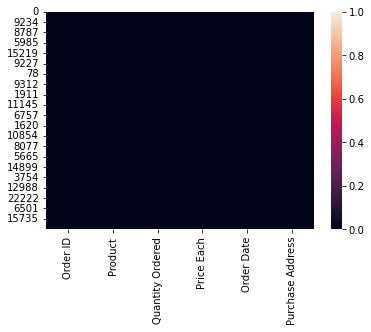

In [216]:
#Checking for NULL values

sns.heatmap(data=pd.isnull(data))

In [185]:
#Drop NULL Values

data = data.dropna()

In [186]:
#Check data structure

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193546 entries, 0 to 24954
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          193546 non-null  object
 1   Product           193546 non-null  object
 2   Quantity Ordered  193546 non-null  object
 3   Price Each        193546 non-null  object
 4   Order Date        193546 non-null  object
 5   Purchase Address  193546 non-null  object
dtypes: object(6)
memory usage: 10.3+ MB


In [187]:
data['Quantity Ordered'].unique()

array([1, 2, 3, 4, 5, 6, 7, '1', '2', '4', '3', '5', '7',
       'Quantity Ordered', '6', '9', '8'], dtype=object)

In [188]:
filter_repeated_values = data['Quantity Ordered'] != 'Quantity Ordered'

data = data[filter_repeated_values]

In [189]:
data['Quantity Ordered'].unique()
data.size

1159746

In [190]:
#Creating Month/Year/Time Column

data['month'] = data['Order Date'].str[0:2]
data['year'] = data['Order Date'].str[6:8]
data['time'] = data['Order Date'].str[-5:-3]
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time
0,147268,Wired Headphones,1,11.99,01/01/19 3:07,"9 Lake St, New York City, NY 10001",01,19,3
1,148041,USB-C Charging Cable,1,11.95,01/01/19 3:40,"760 Church St, San Francisco, CA 94016",01,19,3
2,149343,Apple Airpods Headphones,1,150.0,01/01/19 4:56,"735 5th St, New York City, NY 10001",01,19,4
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 5:53,"75 Jackson St, Dallas, TX 75001",01,19,5
4,149350,USB-C Charging Cable,2,11.95,01/01/19 6:03,"943 2nd St, Atlanta, GA 30301",01,19,6
...,...,...,...,...,...,...,...,...,...
24950,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001",12,19,23
24951,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,"30 Elm St, San Francisco, CA 94016",12,19,23
24952,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016",12,19,23
24953,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001",12,19,23


In [191]:
#Change Column Types - numerical

data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

In [192]:
#Check Data Types

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193291 entries, 0 to 24954
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          193291 non-null  object 
 1   Product           193291 non-null  object 
 2   Quantity Ordered  193291 non-null  int64  
 3   Price Each        193291 non-null  float64
 4   Order Date        193291 non-null  object 
 5   Purchase Address  193291 non-null  object 
 6   month             193291 non-null  object 
 7   year              193291 non-null  object 
 8   time              193291 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 14.7+ MB


In [193]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time
0,147268,Wired Headphones,1,11.99,01/01/19 3:07,"9 Lake St, New York City, NY 10001",01,19,3
1,148041,USB-C Charging Cable,1,11.95,01/01/19 3:40,"760 Church St, San Francisco, CA 94016",01,19,3
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 4:56,"735 5th St, New York City, NY 10001",01,19,4
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 5:53,"75 Jackson St, Dallas, TX 75001",01,19,5
4,149350,USB-C Charging Cable,2,11.95,01/01/19 6:03,"943 2nd St, Atlanta, GA 30301",01,19,6
...,...,...,...,...,...,...,...,...,...
24950,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001",12,19,23
24951,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,"30 Elm St, San Francisco, CA 94016",12,19,23
24952,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016",12,19,23
24953,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001",12,19,23


In [194]:
#Extract city from Address

city = data['Purchase Address'].str.split(", ",expand=True)[1]
city

0        New York City
1        San Francisco
2        New York City
3               Dallas
4              Atlanta
             ...      
24950           Dallas
24951    San Francisco
24952    San Francisco
24953      Los Angeles
24954         Portland
Name: 1, Length: 193291, dtype: object

In [195]:
#Join city column to data

data = pd.concat([data,city],axis=1)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time,1
0,147268,Wired Headphones,1,11.99,01/01/19 3:07,"9 Lake St, New York City, NY 10001",01,19,3,New York City
1,148041,USB-C Charging Cable,1,11.95,01/01/19 3:40,"760 Church St, San Francisco, CA 94016",01,19,3,San Francisco
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 4:56,"735 5th St, New York City, NY 10001",01,19,4,New York City
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 5:53,"75 Jackson St, Dallas, TX 75001",01,19,5,Dallas
4,149350,USB-C Charging Cable,2,11.95,01/01/19 6:03,"943 2nd St, Atlanta, GA 30301",01,19,6,Atlanta
...,...,...,...,...,...,...,...,...,...,...
24950,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001",12,19,23,Dallas
24951,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,"30 Elm St, San Francisco, CA 94016",12,19,23,San Francisco
24952,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016",12,19,23,San Francisco
24953,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001",12,19,23,Los Angeles


In [196]:
#Rename Column

data = data.rename({1:'City'},axis=1)

In [197]:
data['Sales'] = data['Quantity Ordered']*data['Price Each']

In [198]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time,City,Sales
0,147268,Wired Headphones,1,11.99,01/01/19 3:07,"9 Lake St, New York City, NY 10001",01,19,3,New York City,11.99
1,148041,USB-C Charging Cable,1,11.95,01/01/19 3:40,"760 Church St, San Francisco, CA 94016",01,19,3,San Francisco,11.95
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 4:56,"735 5th St, New York City, NY 10001",01,19,4,New York City,150.00
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 5:53,"75 Jackson St, Dallas, TX 75001",01,19,5,Dallas,2.99
4,149350,USB-C Charging Cable,2,11.95,01/01/19 6:03,"943 2nd St, Atlanta, GA 30301",01,19,6,Atlanta,23.90
...,...,...,...,...,...,...,...,...,...,...,...
24950,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001",12,19,23,Dallas,3.84
24951,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,"30 Elm St, San Francisco, CA 94016",12,19,23,San Francisco,5.98
24952,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016",12,19,23,San Francisco,5.98
24953,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001",12,19,23,Los Angeles,2.99


In [199]:
#Calculation for Total Sales

data_q1 = data[['year','Sales']]

In [200]:
data_q1.groupby(['year']).sum()

,Sales
year,
19,35895083.28


In [201]:
#Calculation for Sales by Month

data_q2 = data[['month','Sales']]
data_q2.groupby(['month']).sum().sort_values(by=['Sales'],ascending=False)['Sales']

month
12    9221253.66
10    3736726.88
04    3390670.24
05    3152606.75
03    2807100.38
07    2647775.76
06    2577802.26
08    2244467.88
02    2202022.42
09    2097560.13
01    1813586.44
11       3510.48
Name: Sales, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Sales'>

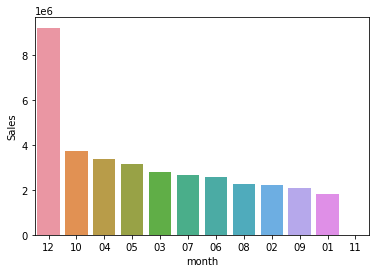

In [202]:
#SNS Bar Plot

plot_q2 = data_q2.groupby(['month']).sum().sort_values(by=['Sales'],ascending=False)['Sales']

sns.barplot(x=plot_q2.index ,y= plot_q2)

In [203]:
#Total Sales by City

data_q3 = data[['City','Sales']]
data_q3.groupby(['City']).sum().sort_values(['Sales'],ascending=False)['Sales']

City
San Francisco    8601822.34
Los Angeles      5633011.03
New York City    4880793.36
Boston           3818570.22
Dallas           2898870.60
Seattle          2883197.14
Atlanta          2880629.14
Portland         2416614.07
Austin           1881575.38
Name: Sales, dtype: float64

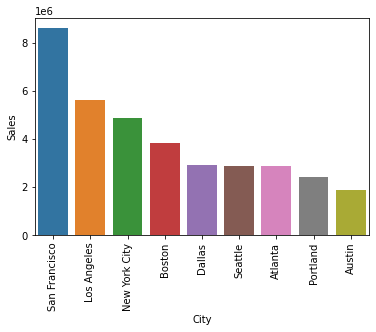

In [204]:
#SNS Bar Plot

plot_q3 = data_q3.groupby(['City']).sum().sort_values(['Sales'],ascending=False)['Sales']

plt_1 = sns.barplot(x=plot_q3.index, y=plot_q3)

for item in plt_1.get_xticklabels():
    item.set_rotation(90)

In [205]:
#Calculation Total Sales by Time of Day

data_q4 = data[['time','Sales']]
data_q4.groupby(['time']).sum().sort_values(['time'],ascending=True)['Sales']

time
 0     739944.32
 1     478871.01
 2     246363.44
 3     148789.60
 4     170860.25
 5     242512.86
 6     448112.32
 7     802057.03
 8    1261306.36
 9    1717122.25
10    2041836.50
11    2392859.63
12    2398928.36
13    2232590.25
14    2176362.42
15    2008648.56
16    1977257.53
17    2213579.94
18    2284031.10
19    2533262.86
20    2385330.22
21    2106411.17
22    1664537.57
23    1223507.73
Name: Sales, dtype: float64

<AxesSubplot:xlabel='time', ylabel='Sales'>

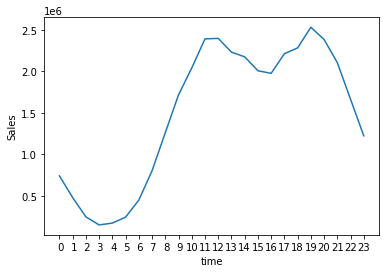

In [206]:
#Use SNS Line Plot to Estimate Potential Ad Periods

plot_q4 = data_q4.groupby(['time']).sum().sort_values(['time'],ascending=True)['Sales']

sns.lineplot(x=plot_q4.index , y=plot_q4)

In [207]:
#Analysis of Products Most Likely to be Sold Together

data_q5 = data[['Order ID','Product']]
data_q5 = data_q5[data_q5['Order ID'].duplicated(keep=False)].sort_values(['Product'])
data_q5

,Order ID,Product
12380,315341,20in Monitor
2262,307329,20in Monitor
16204,307648,20in Monitor
22735,307460,20in Monitor
12745,312201,20in Monitor
...,...,...
10393,315047,iPhone
17,209938,iPhone
43,209961,iPhone
10450,315222,iPhone


In [208]:
data_q5.groupby('Order ID').sum()['Product']

Order ID
141275              USB-C Charging CableWired Headphones
141290     AA Batteries (4-pack)Apple Airpods Headphones
141365                   Vareebadd PhoneWired Headphones
141384                  Google PhoneUSB-C Charging Cable
141450            Bose SoundSport HeadphonesGoogle Phone
                               ...                      
278653                    Lightning Charging CableiPhone
278697            27in 4K Gaming MonitorWired Headphones
278706                  Google PhoneUSB-C Charging Cable
278710              27in FHD MonitorUSB-C Charging Cable
278718    Bose SoundSport HeadphonesUSB-C Charging Cable
Name: Product, Length: 29507, dtype: object

In [209]:
data_q5_groups = pd.DataFrame(data_q5.groupby('Order ID').sum()['Product'])
data_q5_groups['number'] = data_q5_groups.index
data_q5_groups.groupby(['Product']).count().sort_values(['number'],ascending=False).head(20)

,number
Product,
USB-C Charging CableUSB-C Charging Cable,2757
AAA Batteries (4-pack)AAA Batteries (4-pack),2746
Lightning Charging CableLightning Charging Cable,2696
AA Batteries (4-pack)AA Batteries (4-pack),2629
Wired HeadphonesWired Headphones,2318
Apple Airpods HeadphonesApple Airpods Headphones,1942
Bose SoundSport HeadphonesBose SoundSport Headphones,1730
27in FHD Monitor27in FHD Monitor,934
27in 4K Gaming Monitor27in 4K Gaming Monitor,827


In [210]:
#Calculation of Product Units Sold by Rank

data_q6 = data[['Product','Quantity Ordered']]
data_q6.groupby(['Product']).sum().sort_values(['Quantity Ordered'],ascending=False)['Quantity Ordered']

Product
AAA Batteries (4-pack)        32220
AA Batteries (4-pack)         28723
USB-C Charging Cable          24963
Lightning Charging Cable      24081
Wired Headphones              21359
Apple Airpods Headphones      16222
Bose SoundSport Headphones    14025
27in FHD Monitor               7791
iPhone                         7089
27in 4K Gaming Monitor         6525
34in Ultrawide Monitor         6498
Google Phone                   5754
Flatscreen TV                  5021
Macbook Pro Laptop             4930
ThinkPad Laptop                4293
20in Monitor                   4273
Vareebadd Phone                2174
LG Washing Machine              693
LG Dryer                        676
Name: Quantity Ordered, dtype: int64

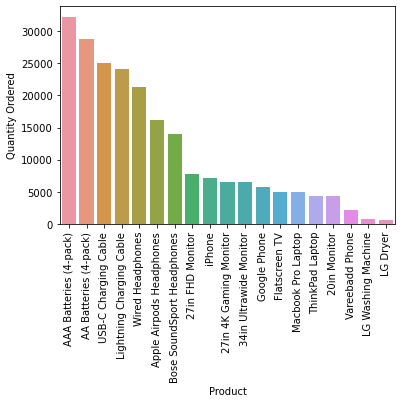

In [211]:
#NS Products Bar Plot

plot_q6 = data_q6.groupby(['Product']).sum().sort_values(['Quantity Ordered'],ascending=False)['Quantity Ordered']

plt = sns.barplot(x=plot_q6.index, y=plot_q6)

for item in plt.get_xticklabels():
    item.set_rotation(90)